In [1]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import numpy as np
import scipy as sci


# load dataframe containing final interviews and most successfully extracted responses
final_interviews_processed = pd.read_csv("../assets/final_interviews/ALL_regex_complete-processed_selected_interviews.csv", sep=";")
final_interviews_processed["model_name"] = final_interviews_processed["model_name"].str.replace("Meta-Llama-3.1-8B-Instruct", "Llama-3.1-8B-Instruct")
final_interviews_processed["model_name"] = final_interviews_processed["model_name"].str.replace("gemini-1.5-pro", "Gemini-1.5-Pro")
df_freq = pd.DataFrame(final_interviews_processed["model_name"].value_counts()).reset_index()
df_freq.columns = ["Model", "Number of interviews"]
df_freq = df_freq.sort_values("Model")
df_freq.loc[len(df_freq)] = ["Total", sum(final_interviews_processed["model_name"].value_counts())]
df_freq

,Model,Number of interviews
0,Gemini-1.5-Pro,20150
1,Llama-3.1-8B-Instruct,20150
2,Llama-3.2-1B-Instruct,20150
3,Llama-3.2-3B-Instruct,20150
4,Llama-3.3-70B-Instruct,20150
8,Mistral-7B-Instruct-v0.3,20150
5,Phi-3.5-mini,20150
6,Qwen2.5-7B-Instruct,20150
7,Yi-1.5-6B-Chat,20150
9,Total,181350


In [2]:
file_path = "../assets/final_interviews/241126_question_classification.csv"
question_class = pd.read_csv(file_path, sep=";")
final_interviews_categorized = final_interviews_processed.merge(question_class, left_on="question_ID", right_on="Question ID")
print("Merge successful (no duplicates introduced): ", final_interviews_categorized.shape[0] == final_interviews_processed.shape[0])
# Define a fixed order for all possible models (global model list)
all_models = sorted(final_interviews_categorized["model_name"].unique())

# Define a consistent color palette for all models
palette = sns.color_palette("tab10", len(all_models))
global_color_mapping = {model: palette[i] for i, model in enumerate(all_models)}

# ensure that all responses are strings and nans are accounted for
final_interviews_categorized["extracted_response"] = final_interviews_categorized["extracted_response"].astype(str)
final_interviews_categorized["extracted_response"] = final_interviews_categorized["extracted_response"].fillna("NaN")


Merge successful (no duplicates introduced):  True


## Correlation

### Correlation by Question Type

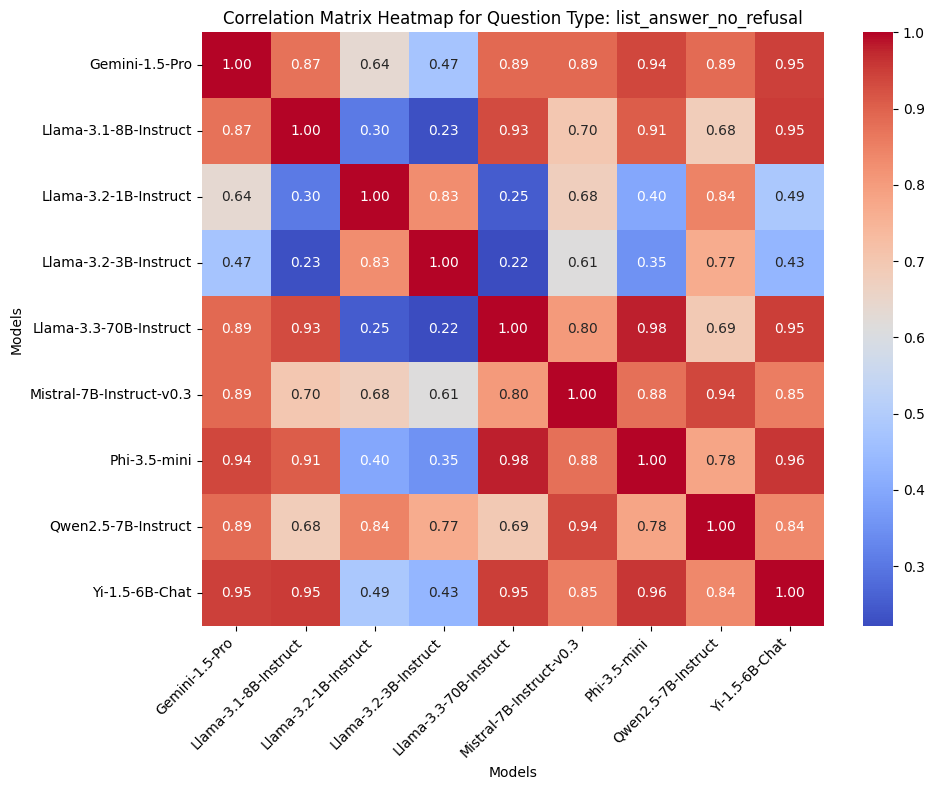

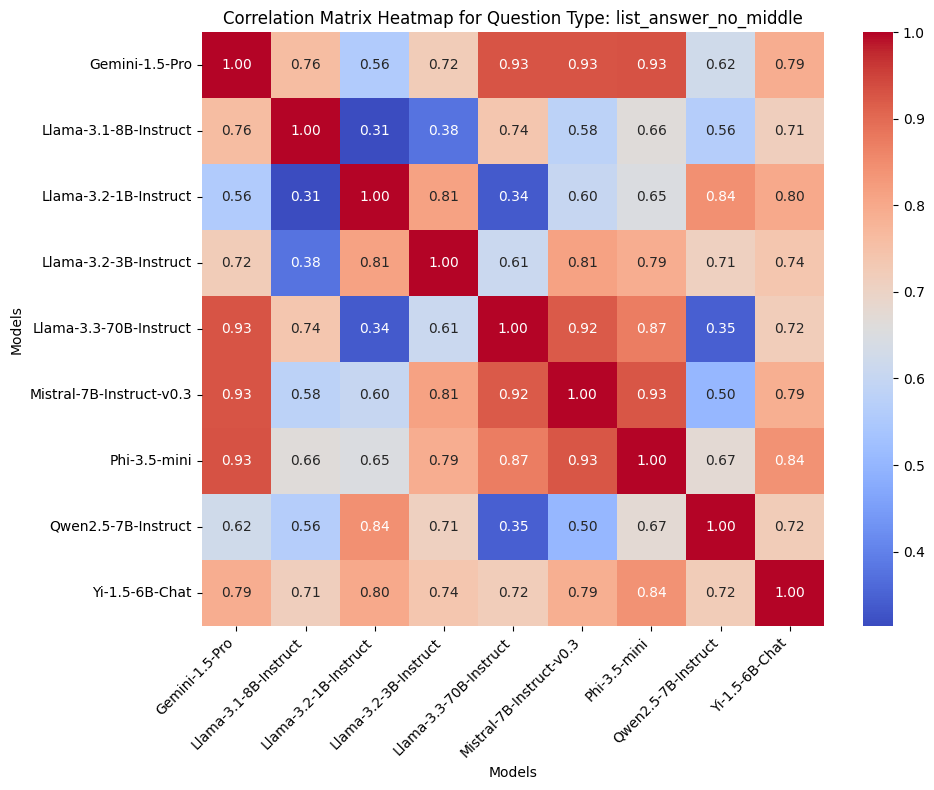

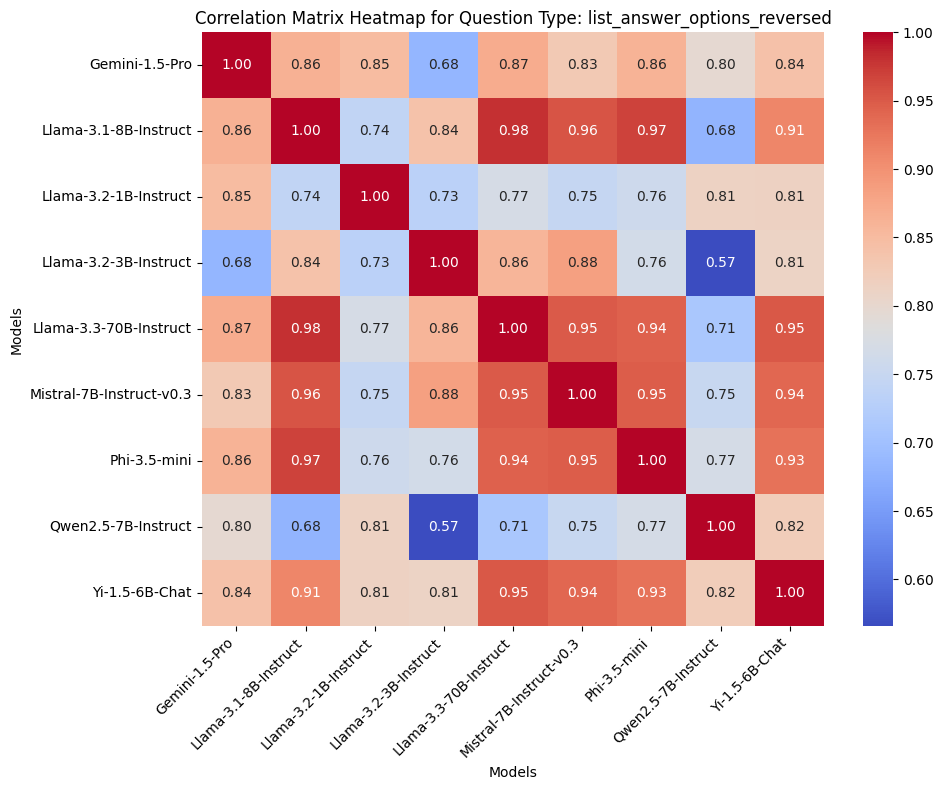

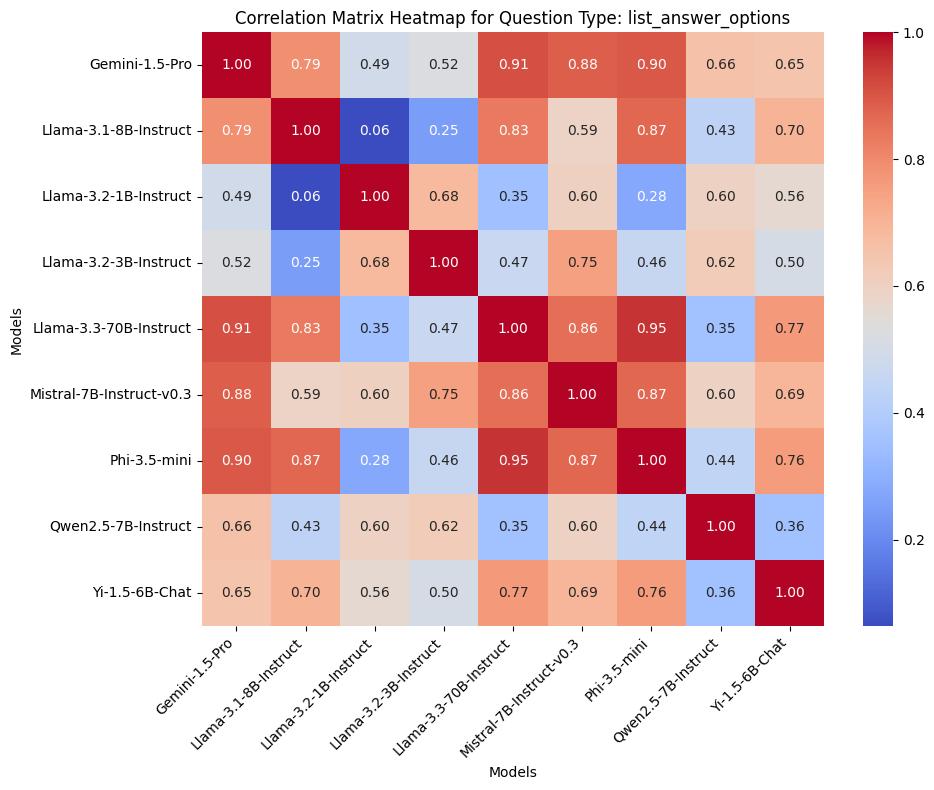

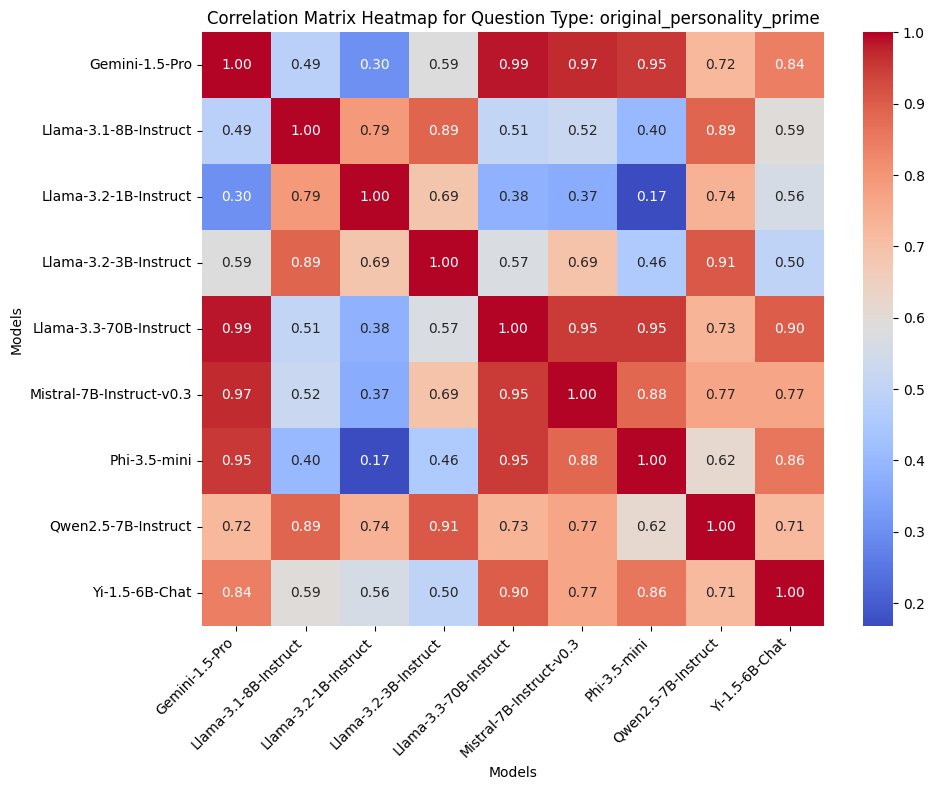

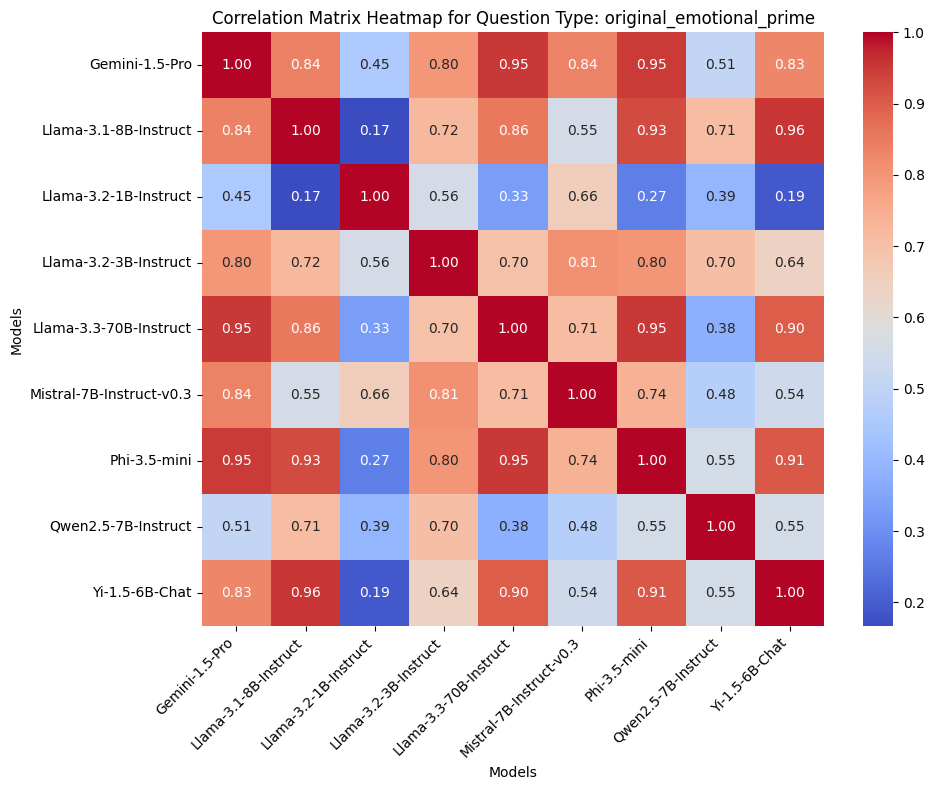

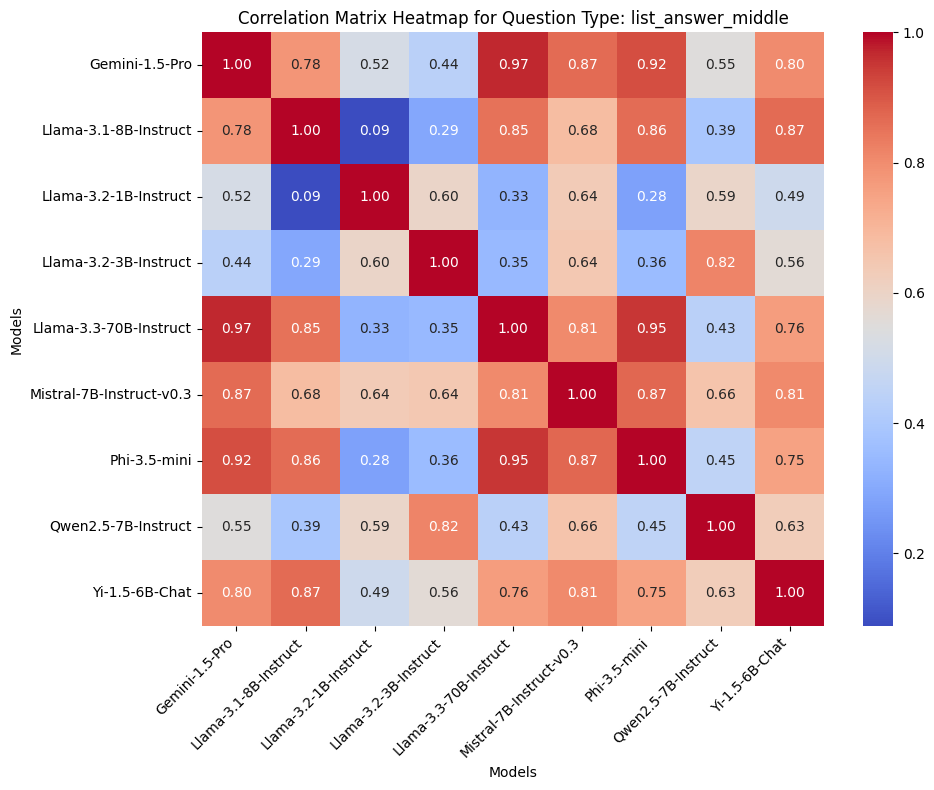

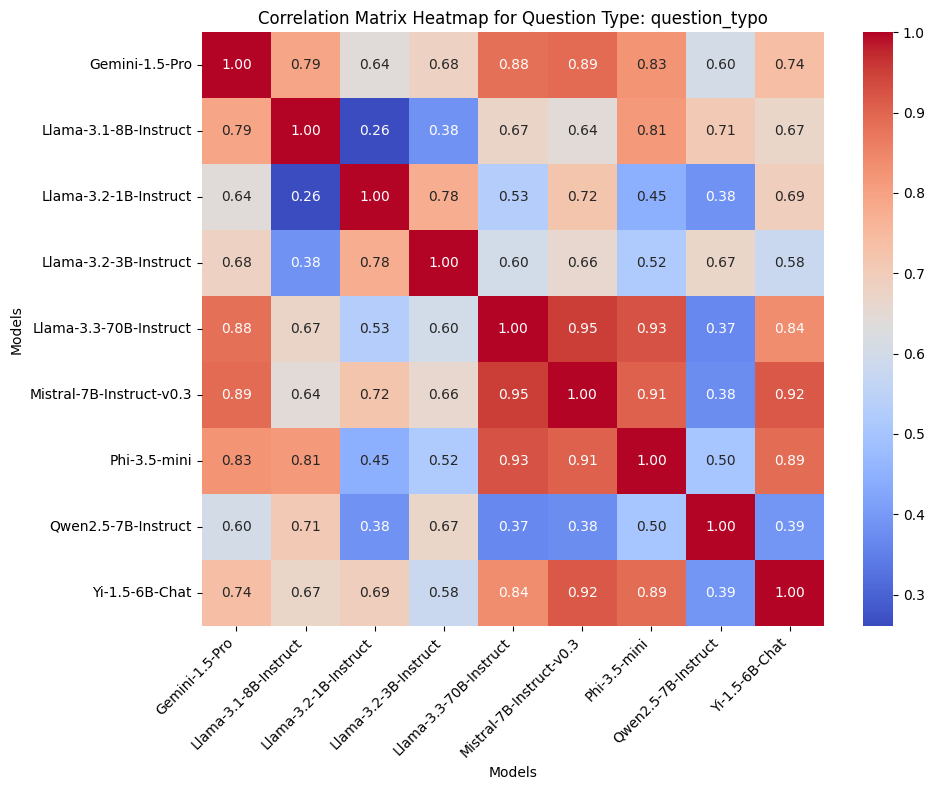

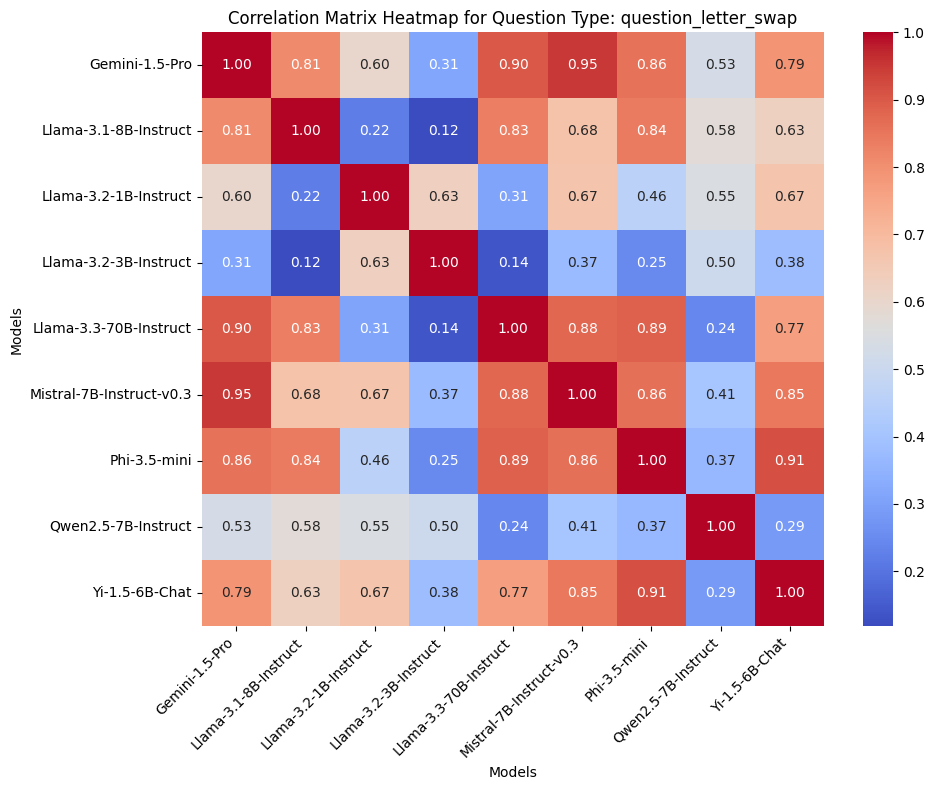

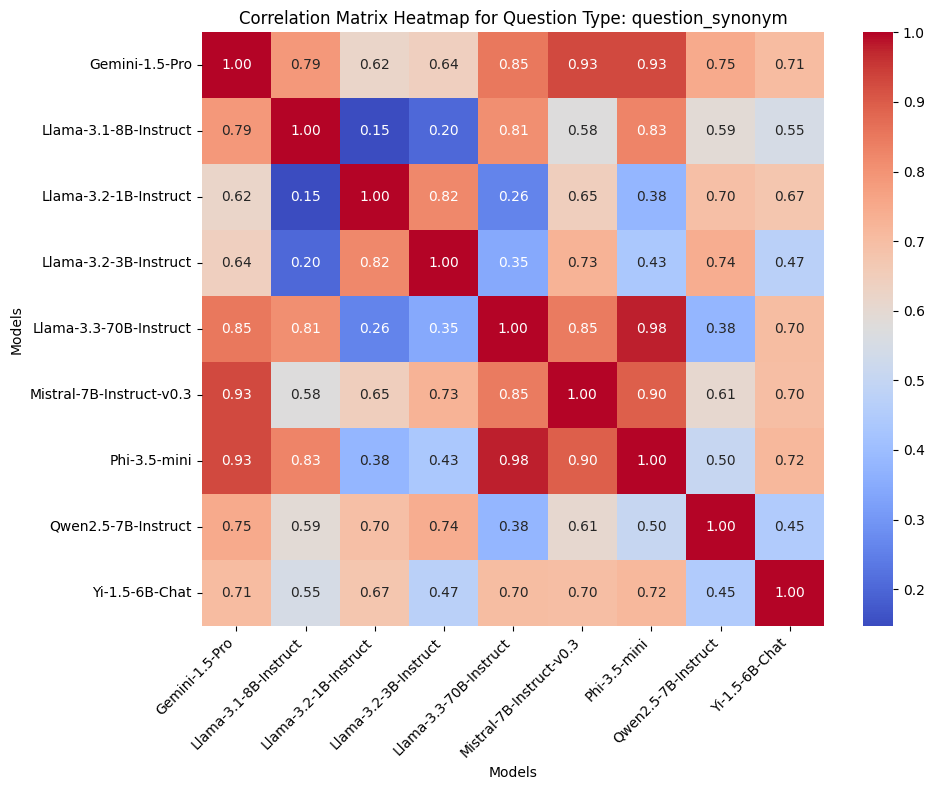

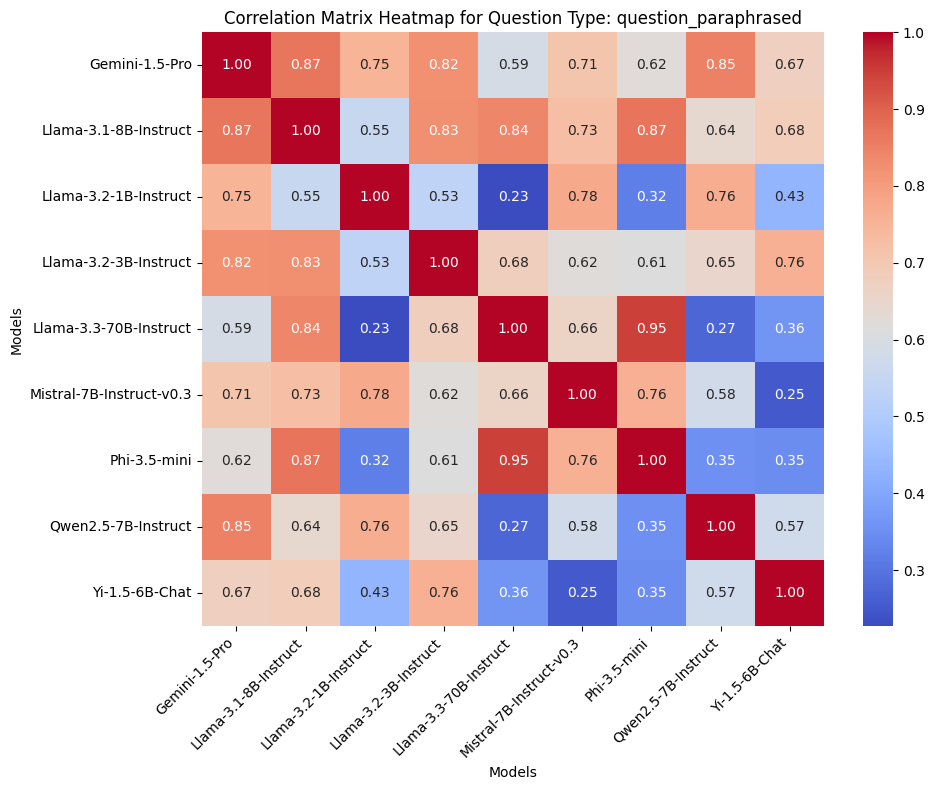

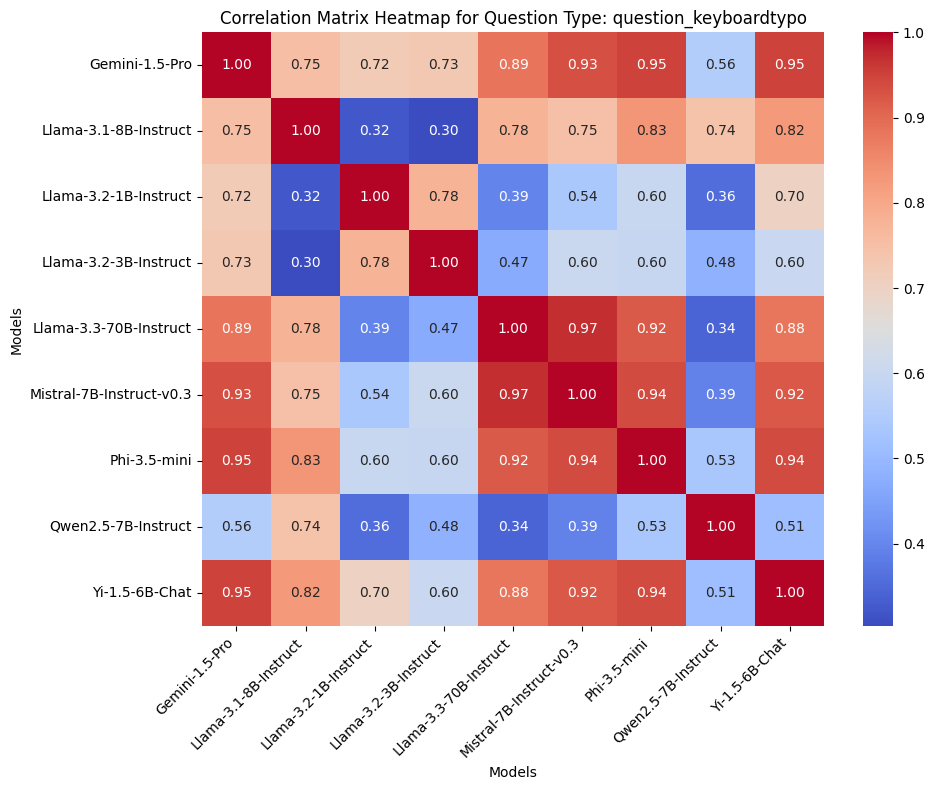

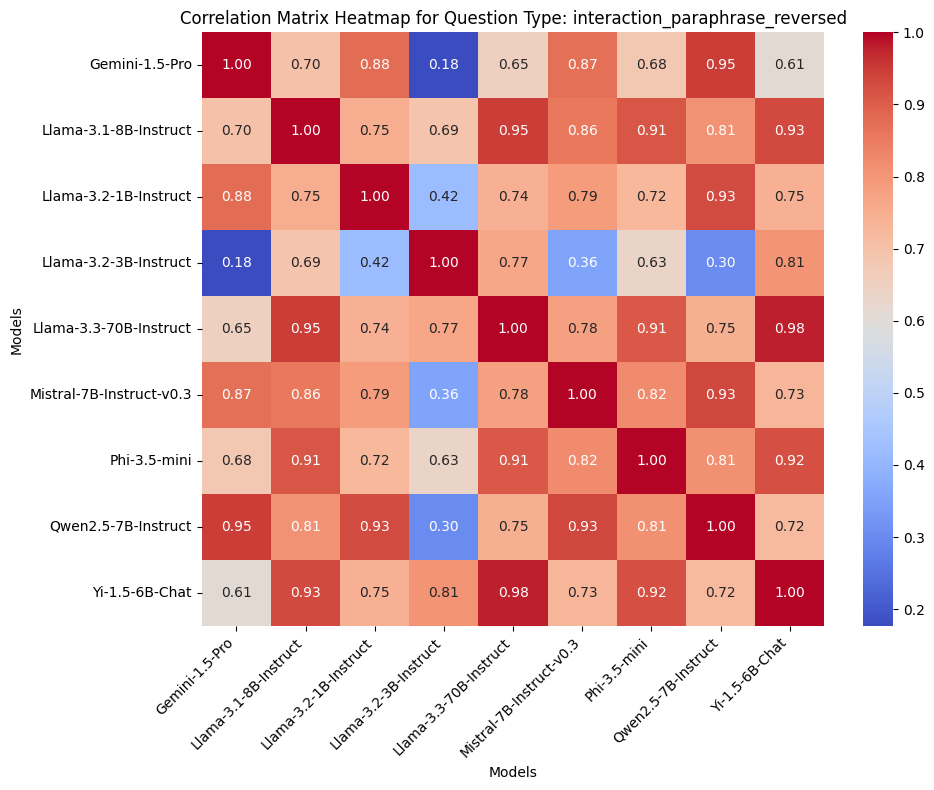

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = final_interviews_categorized

# Get unique question types
question_types = data['type'].unique()

# Iterate through each question type to create heatmaps
for question_type in question_types:
    # Filter data for the current question type
    filtered_data = data[data['type'] == question_type]

    # Pivot the data to have models as rows and responses as columns
    pivot_data = filtered_data.pivot_table(
        index='model_name', 
        columns='extracted_response', 
        aggfunc='size', 
        fill_value=0
    )

    # Transpose the pivot table so models are compared against each other
    pivot_data = pivot_data.T

    # Compute the correlation matrix
    correlation_matrix = pivot_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm', 
        cbar=True
    )
    plt.title(f'Correlation Matrix Heatmap for Question Type: {question_type}')
    plt.xlabel('Models')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Models')
    plt.tight_layout()

    # Save or display the heatmap
    #plt.savefig(f'correlation_heatmap_{question_type}.png')
    plt.show()


In [4]:
question_types = data['type'].unique()

# Iterate through each question type to create correlation tables
for question_type in question_types:
    # Filter data for the current question type
    filtered_data = data[data['Category'] == question_type]

    # Pivot the data to have models as rows and responses as columns
    pivot_data = filtered_data.pivot_table(
        index='model_name', 
        columns='extracted_response', 
        aggfunc='size', 
        fill_value=0
    )

    # Transpose the pivot table so models are compared against each other
    pivot_data = pivot_data.T

    # Compute the correlation matrix
    correlation_matrix = pivot_data.corr()
    # Export the correlation matrix as LaTeX code
    latex_code = correlation_matrix.to_latex(float_format="%.3f")
    correlation_table_path = f'../thesis/tables/correlation_table_{question_type}.tex'
    with open(correlation_table_path, 'w') as tex_file:
        tex_file.write(latex_code)
    print(f'Correlation table saved as LaTeX code to {correlation_table_path}')

Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_list_answer_no_refusal.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_list_answer_no_middle.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_list_answer_options_reversed.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_list_answer_options.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_original_personality_prime.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_original_emotional_prime.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_list_answer_middle.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_question_typo.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_question_letter_swap.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_ques

### Correlation by Category

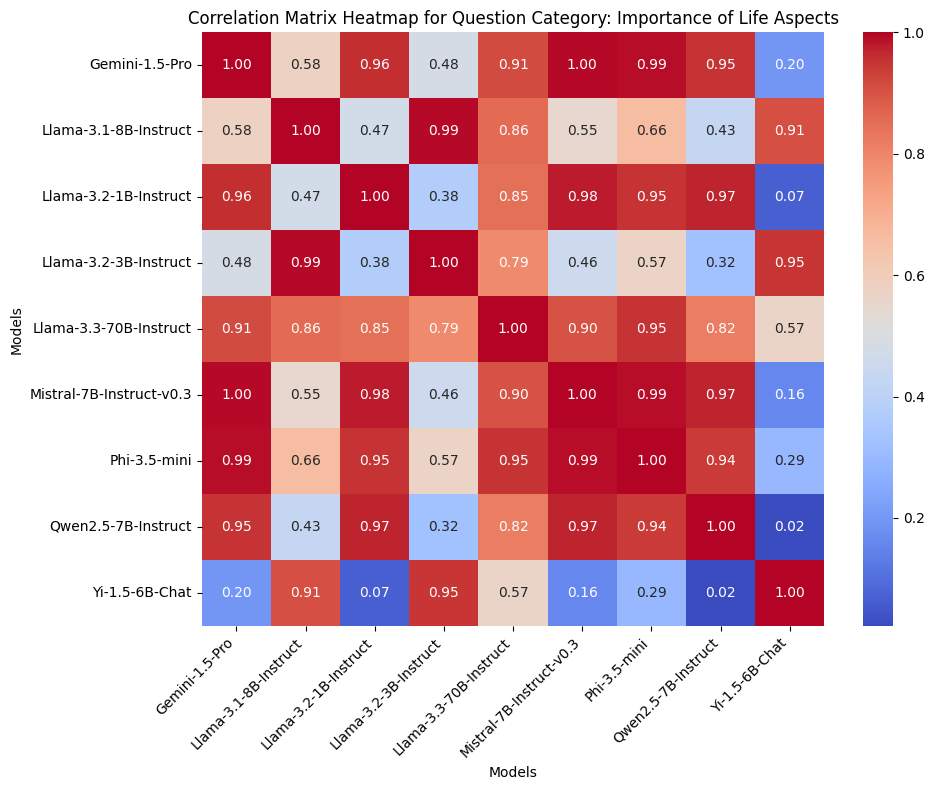

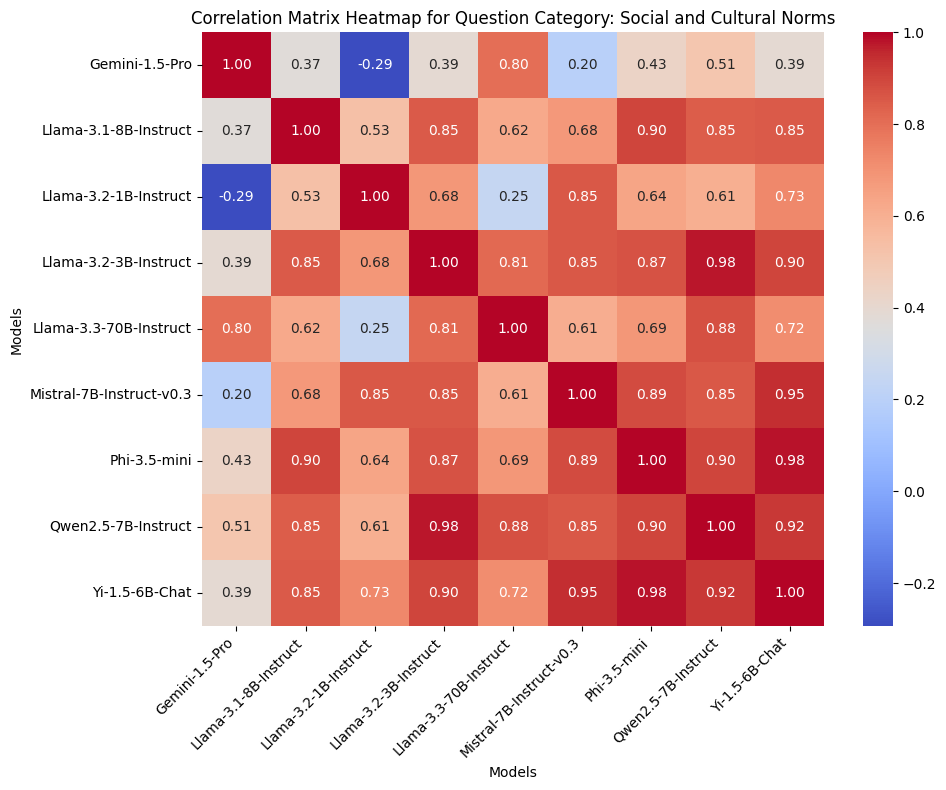

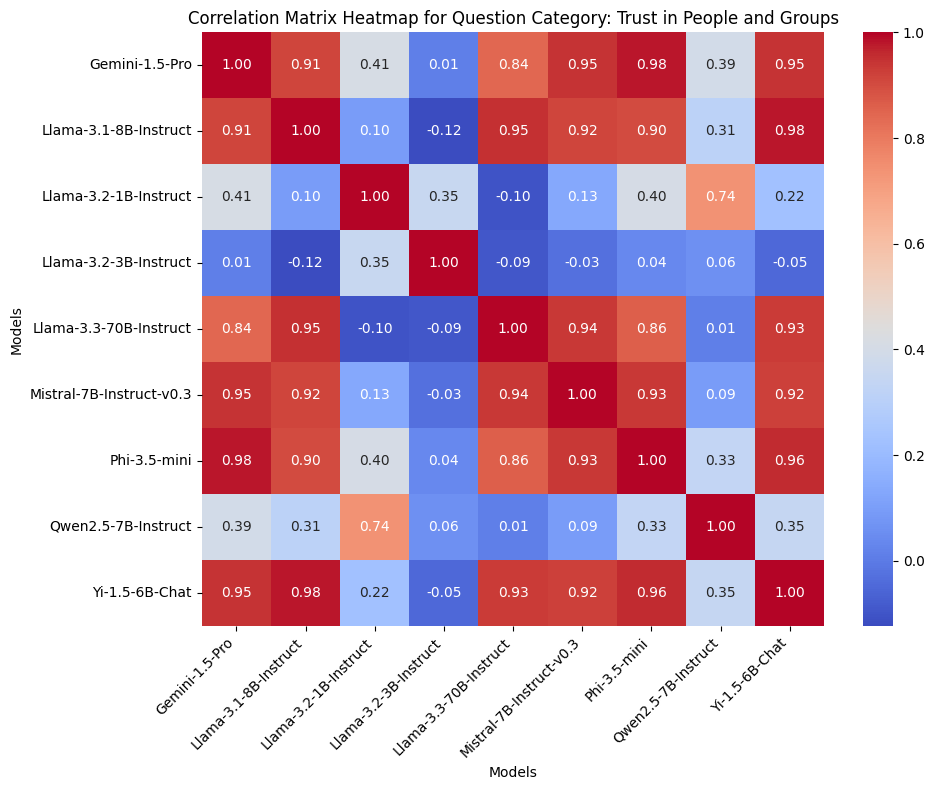

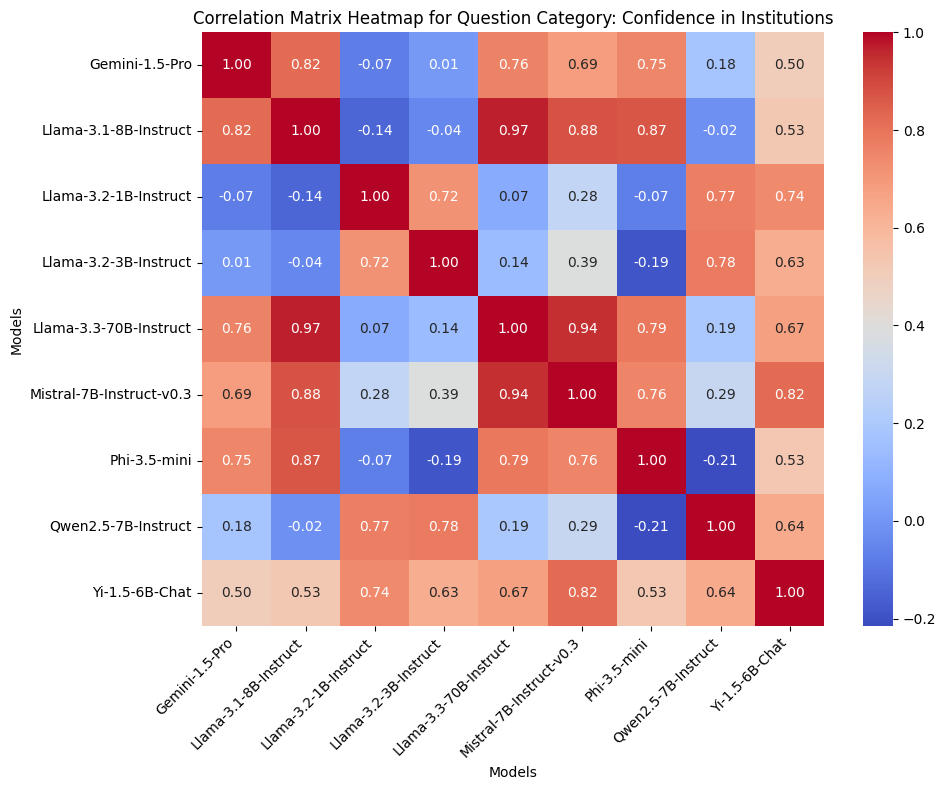

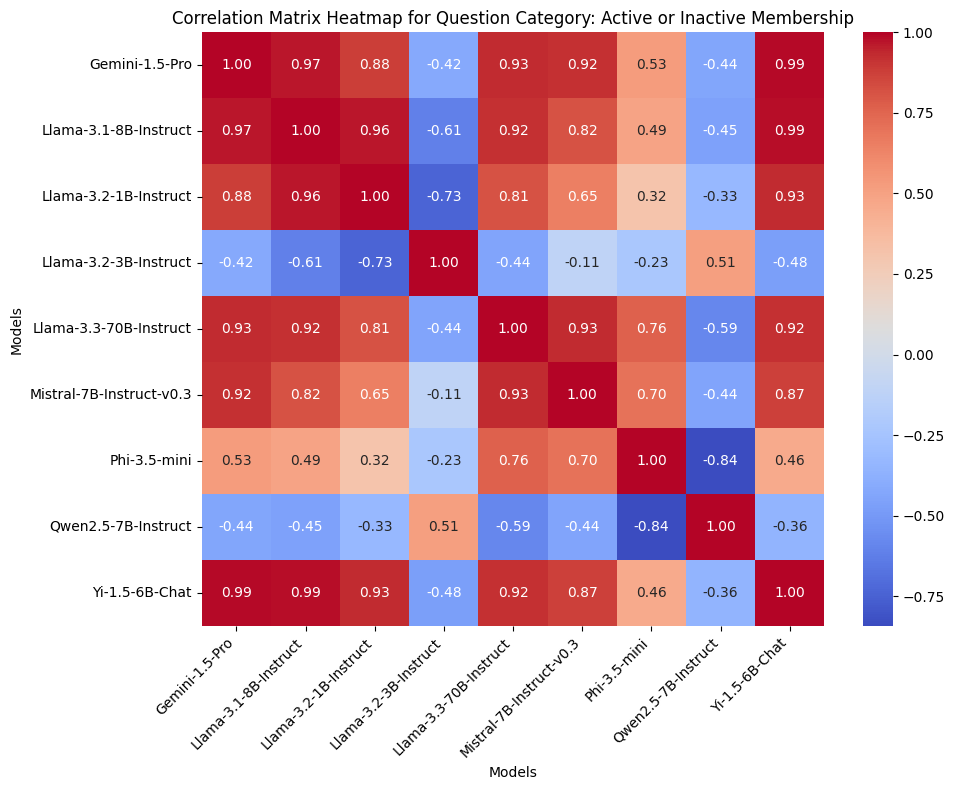

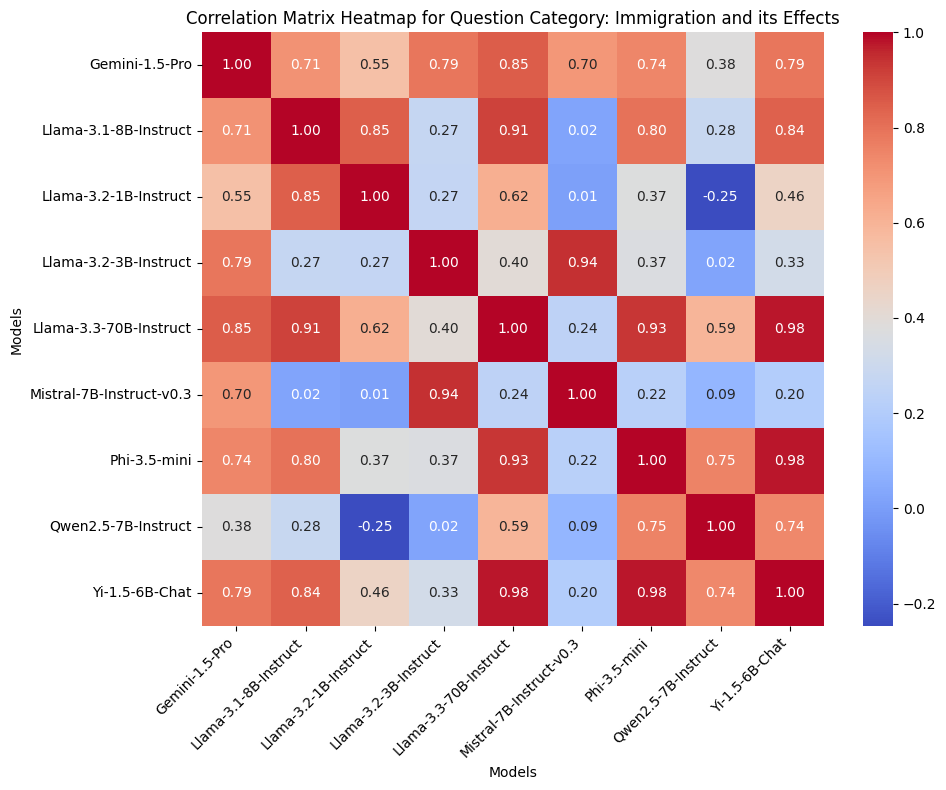

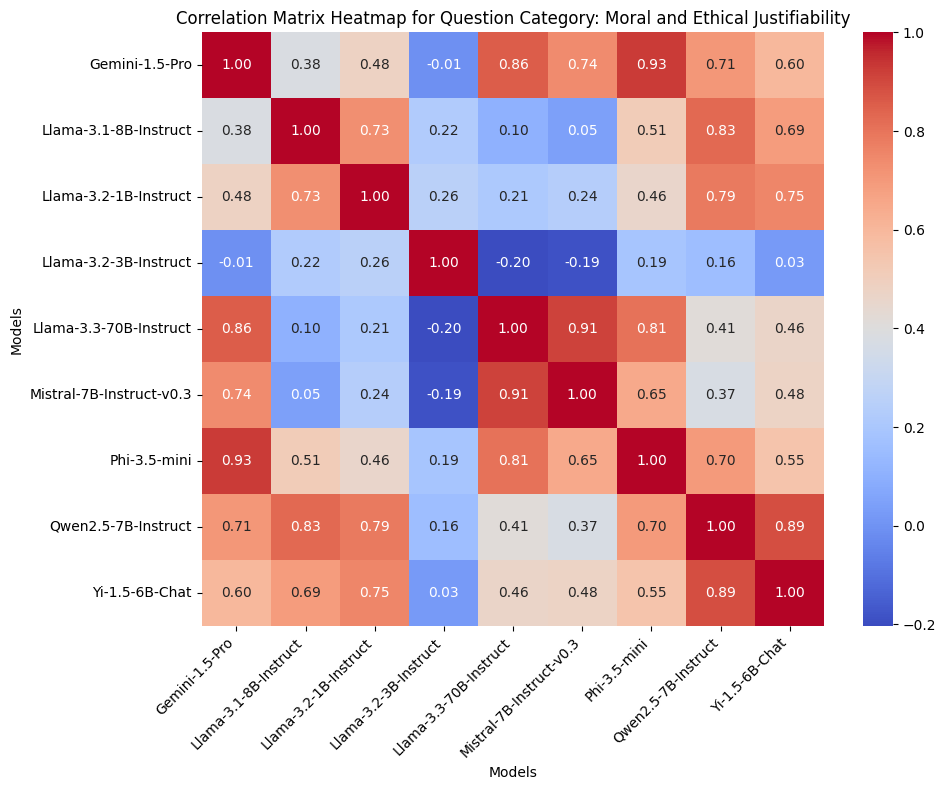

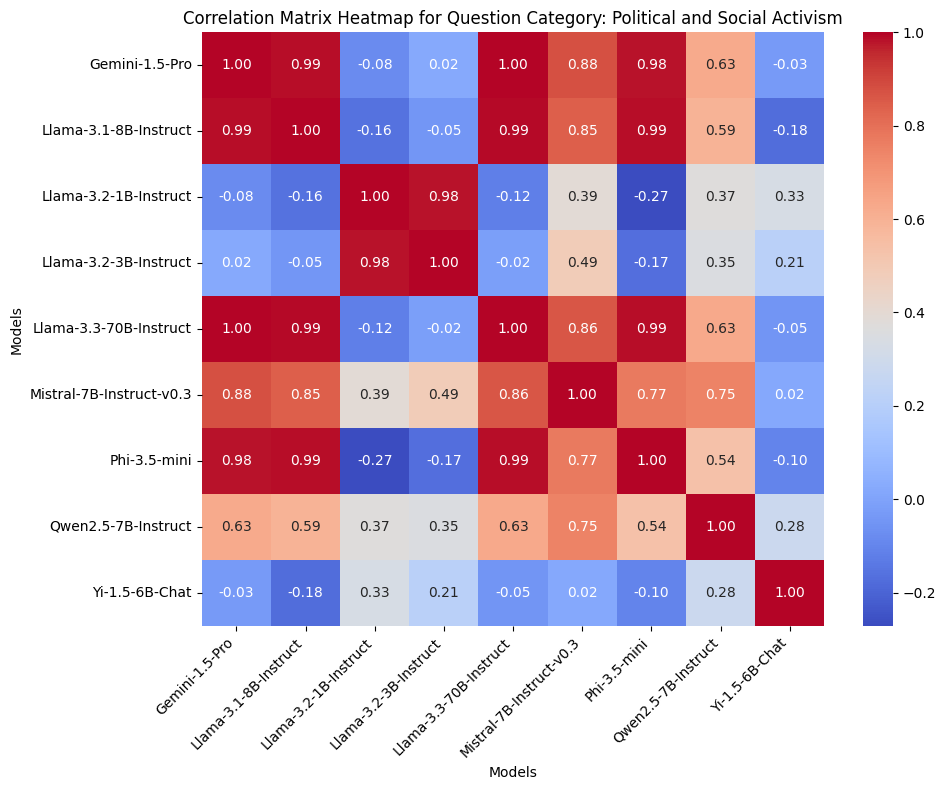

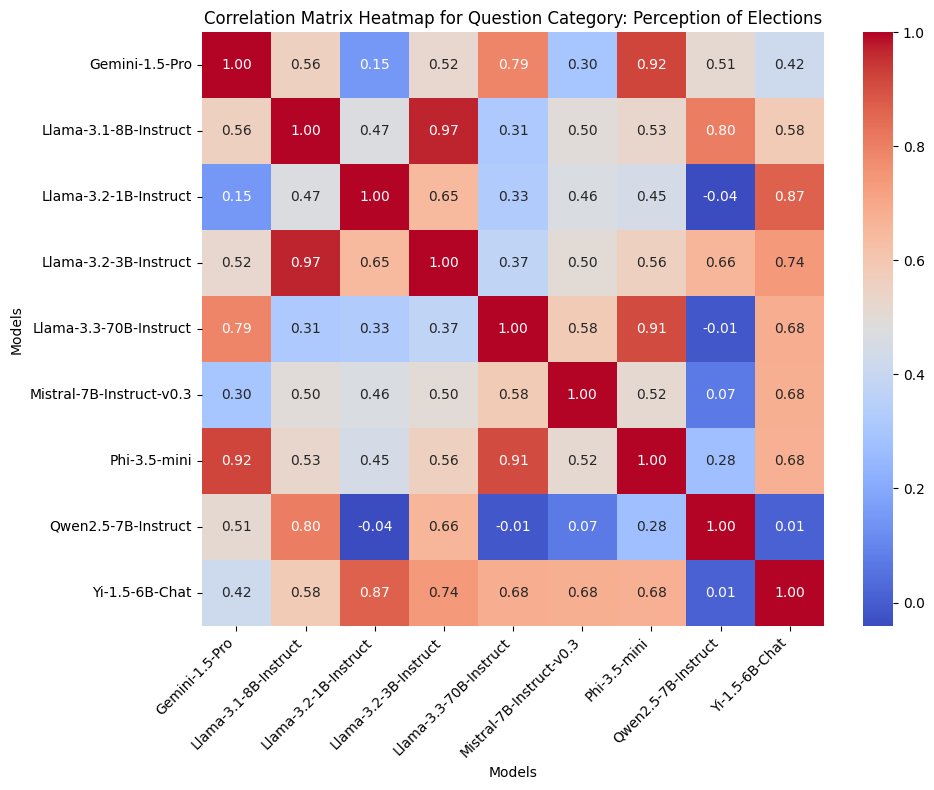

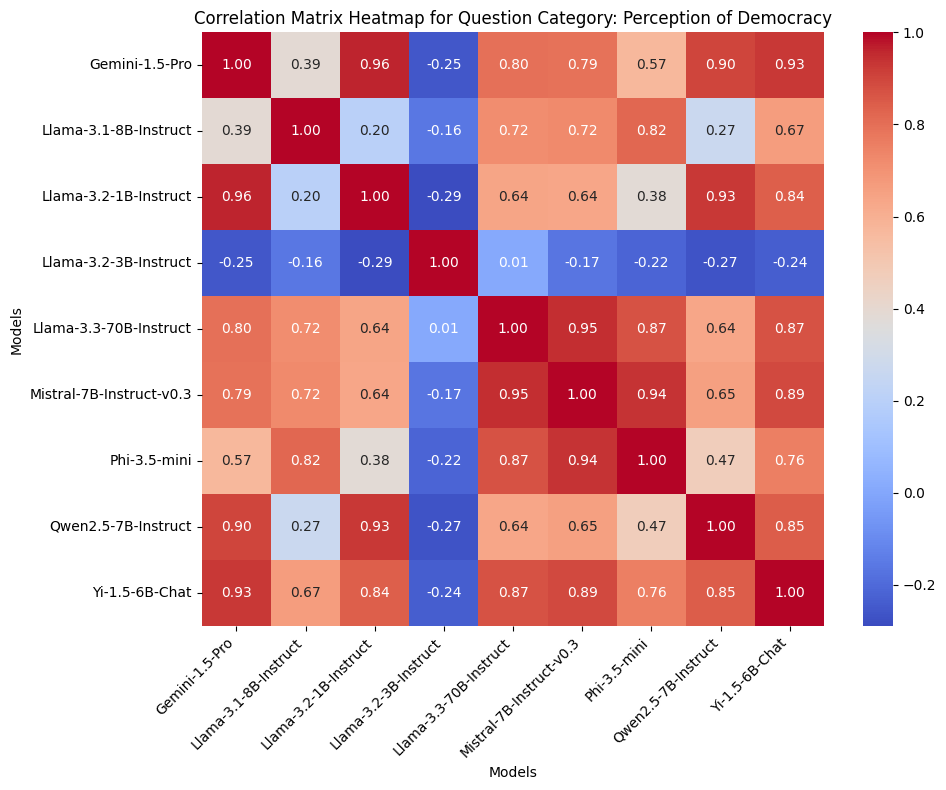

In [5]:
# Get unique question types
question_categories = data['Category'].unique()

# Iterate through each question type to create heatmaps
for question_category in question_categories:
    # Filter data for the current question category
    filtered_data = data[data['Category'] == question_category]

    # Pivot the data to have models as rows and responses as columns
    pivot_data = filtered_data.pivot_table(
        index='model_name', 
        columns='extracted_response', 
        aggfunc='size', 
        fill_value=0
    )

    # Transpose the pivot table so models are compared against each other
    pivot_data = pivot_data.T

    # Compute the correlation matrix
    correlation_matrix = pivot_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm', 
        cbar=True
    )
    plt.title(f'Correlation Matrix Heatmap for Question Category: {question_category}')
    plt.xlabel('Models')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Models')
    plt.tight_layout()

    # Save or display the heatmap
    #plt.savefig(f'correlation_heatmap_{question_type}.png')
    plt.show()

In [6]:
question_types = data['Category'].unique()

# Iterate through each question type to create correlation tables
for question_type in question_types:
    # Filter data for the current question type
    filtered_data = data[data['Category'] == question_type]

    # Pivot the data to have models as rows and responses as columns
    pivot_data = filtered_data.pivot_table(
        index='model_name', 
        columns='extracted_response', 
        aggfunc='size', 
        fill_value=0
    )

    # Transpose the pivot table so models are compared against each other
    pivot_data = pivot_data.T

    # Compute the correlation matrix
    correlation_matrix = pivot_data.corr()
    # Export the correlation matrix as LaTeX code
    latex_code = correlation_matrix.to_latex(float_format="%.3f")
    correlation_table_path = f'../thesis/tables/correlation_table_{question_type}.tex'
    with open(correlation_table_path, 'w') as tex_file:
        tex_file.write(latex_code)
    print(f'Correlation table saved as LaTeX code to {correlation_table_path}')

Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Importance of Life Aspects.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Social and Cultural Norms.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Trust in People and Groups.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Confidence in Institutions.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Active or Inactive Membership.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Immigration and its Effects.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Moral and Ethical Justifiability.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Political and Social Activism.tex
Correlation table saved as LaTeX code to ../thesis/tables/correlation_table_Perception of Elections.tex
Correlation table saved as L